<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/05_Regression_4_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Scratch Implementation


In [ ]:
import numpy as np
class LinearRegression() :
      def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

In [ ]:
def predict(self, X):
      return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

In [ ]:
def r2_score(self, X, y):
    y_ = self.predict(X)
    ss_res = np.sum((y-y_)**2)
    ss_tot = np.sum((y- y.mean())**2)
    score = (1- ss_res/ss_tot)
    return score

LinearRegression.score=r2_score

In [ ]:
def update_weights(self):
    Y_pred = self.predict( self.X )
    # calculate gradients
    dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
    db = - 2*np.sum(self.Y - Y_pred)/self.m
    # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
    # update weights
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    return self

LinearRegression.update_weights=update_weights

In [ ]:
def fit(self, X, Y):
    # no_of_training_examples, no_of_features
    self.m, self.d = X.shape
    # weight initialization
    self.W = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.Y = Y
    self.error_list=[]
    # gradient descent learning
    for i in range(self.iterations):
        self.update_weights()
        Y_pred=X.dot(self.W)+self.b
        error=np.square(np.subtract(Y,Y_pred)).mean()
        self.error_list.append(error)
    return self

LinearRegression.fit=fit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

In [ ]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
lr.W

In [ ]:
lr.b

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
y_hat = lr.predict(X_test)
Adj_R = 1 - (1-lr.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

# Statsmodel Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/03_Apr23_Inter_Aug23_Adv_Feb23_Begi_w:o_Python_Mar23_Inter_Oct22_Beg_Tue_Sept22 Begi_Tue/Intro_to_ML/06_Regression_5/cars24-car-price-clean.csv
100%|██████████████████████████████████████| 7.10M/7.10M [00:00<00:00, 9.59MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
y=df[['selling_price']]
X=df.drop('selling_price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
y_train = np.array(y_train)

In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:16:30   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.664e-05      0.002  

In [ ]:
results.predict(X_sm)

3443    -0.354511
16090   -0.476414
11070   -0.359932
19214   -0.121763
17843   -0.656579
           ...   
1099     2.335550
18898   -0.334020
11798    0.398398
6637     2.564373
2575    -0.076645
Length: 15856, dtype: float64

## Multicollinearity and Variance Inflation Factor

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/Users/nikhilsanghi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,18.30
10,Diesel,17.30
16,>5,13.04
15,5,11.75
3,engine,6.26
7,model,5.78
4,max_power,5.00
2,mileage,3.22


Removing the features with very high VIF values

In [ ]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:50:56   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004      0.002  

In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', i)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features'])
    i += 1

Reached threshold
Highest vif: Features    model
VIF          5.75
Name: 0, dtype: object
Current adj.R2 0.8318553555450335
Features removed: 4
List of features removed: ['year', 'Petrol', '>5', 'engine']


In [ ]:
print(vif)
print(sm_model.summary())

            Features   VIF
0              model  5.75
1          max_power  3.31
2               make  3.16
3            mileage  2.28
5                age  1.88
6             Manual  1.77
4             Diesel  1.66
7                  5  1.47
9          km_driven  1.20
8           Electric  1.18
10        Individual  1.08
11  Trustmark Dealer  1.02
12               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6538.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:55:37   Log-Likelihood:                -8348.2
No. Observations:               15856   AIC:                         1.672e+04
Df Residuals:                   15843   BIC:                         

### Errors are normally Distributed

In [ ]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

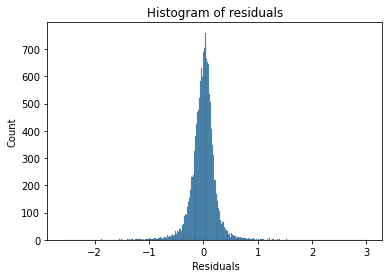

In [ ]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic
## Closer the value to 1, more is the normality.

/Users/nikhilsanghi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.8526064157485962

### Heteroskedasticity should not exist

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

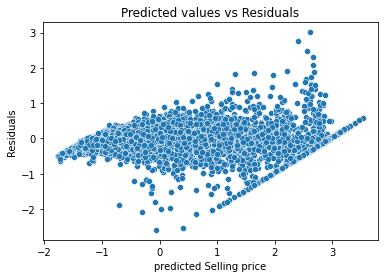

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

# Sklearn Implementation of Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

## Univariate

In [ ]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
y_hat = model.predict(X1)

In [ ]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

## Multivariate

In [ ]:
print(X.shape, y.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)

plt.legend()
plt.show()

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
model.coef_

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [ ]:
X_test.columns[np.argmax(np.abs(model.coef_))] # Most Important

In [ ]:
X_test.columns[np.argmin(np.abs(model.coef_))] # Least Important

# Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

In [ ]:

from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output = model.predict(X)

print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [ ]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [ ]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)


print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1